In [245]:
import matplotlib as mp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import bokeh
import datetime as dt


In [478]:
limeKiln = {}
orcaSound = {}

# these are approx, picked off the map

limeKiln['location'] = np.array((-123.1616778,48.5158084))
orcaSound['location'] = np.array((-123.1824248,48.5584463))


In [479]:
for i in range(10):
    print(dt.datetime.now() + dt.timedelta(hours=i/10))

2018-05-01 16:43:45.248416
2018-05-01 16:49:45.252902
2018-05-01 16:55:45.253736
2018-05-01 17:01:45.254719
2018-05-01 17:07:45.255429
2018-05-01 17:13:45.257100
2018-05-01 17:19:45.257345
2018-05-01 17:25:45.257899
2018-05-01 17:31:45.258097
2018-05-01 17:37:45.258286


In [480]:
def calc_intensity(sensor_loc, object_loc, scale_factor=1.0):
    """calc_intensity figures out the euclidean distance between two points and scales
       the intensity appropriately as 1/r^2 and a scale factor (meant to be for acoustics)"""
    distance = np.linalg.norm(sensor_loc - object_loc)
    return scale_factor*(1/(distance**2))

    

In [481]:
calc_intensity(limeKiln['location'], orcaSound['location'])

444.75507613369746

In [482]:
calc_intensity(limeKiln['location'], orcaSound['location'],2.0)

889.51015226739491

In [483]:
orca_start = np.array([0,0])

In [484]:
print(calc_intensity(orca_start, limeKiln['location']),
calc_intensity(orca_start, orcaSound['location']))


5.70692132586e-05 5.70391030578e-05


In [485]:
vel = np.array([-0.5,0.9])

In [486]:
orca_start + 2*vel

array([-1. ,  1.8])

In [487]:
num_entries = 10000

In [488]:
orca_locations = []
for i in range(num_entries):
    # This started as lazy cartesian math. Going to stay lazy and just add an origin in Haro Strait 
    # and do simple deg-->km math for lat and lon to get projection close. It's fake data, so who cares
    
    # Origin in Haro Strait: 48.54,-123.24
    # km --> deg ~= 111.111 km /deg (so, divide by 111.111km) With humble projection apologies to @lageratrobe!
    
    new_orca_loc = orca_start + [-123.24,48.54] + [np.sin(i*vel[0])/(111.111),5*np.sin(i*vel[1])/111.111]
    orca_locations.append(new_orca_loc)
    

In [489]:
limeKiln['obs'] = []
orcaSound['obs'] = []
orca_locations

[array([-123.24,   48.54]),
 array([-123.24431483,   48.57524975]),
 array([-123.24757325,   48.58382319]),
 array([-123.24897746,   48.55923211]),
 array([-123.24818369,   48.52008656]),
 array([-123.24538625,   48.4960111 ]),
 array([-123.24127008,   48.50522556]),
 array([-123.23684295,   48.54075663]),
 array([-123.23318877,   48.57571509]),
 array([-123.23120222,   48.58364509]),
 array([-123.23136967,   48.55854535]),
 array([-123.23365013,   48.51941086]),
 array([-123.23748526,   48.49585783]),
 array([-123.24193608,   48.5057107 ]),
 array([-123.24591289,   48.54151304]),
 array([-123.24844201,   48.57617034]),
 array([-123.24890423,   48.58345464]),
 array([-123.24718639,   48.55785334]),
 array([-123.24370907,   48.51874099]),
 array([-123.23932364,   48.49571703]),
 array([-123.23510381,   48.50620554]),
 array([-123.23208273,   48.54226902]),
 array([-123.23100008,   48.57661535]),
 array([-123.23212092,   48.58325192]),
 array([-123.23517084,   48.55715629]),
 array([-123

In [490]:
10000/( 12 * 60 *60)
samplingPeriod = dt.timedelta(hours=6)
samplingRate = samplingPeriod/num_entries
samplingRate.total_seconds()
6*60*60/10000
init_time = dt.datetime.now() - samplingPeriod

In [491]:
i = 1;
for orca_loc in orca_locations:
    limeKiln['obs'].append(([init_time + i*samplingRate], calc_intensity(orca_loc,limeKiln['location'])))
    orcaSound['obs'].append(([init_time + i*samplingRate], calc_intensity(orca_loc,orcaSound['location'])))
    i += 1

orca_locations
orcaSound['obs']

[([datetime.datetime(2018, 5, 1, 10, 44, 3, 888940)], 273.58511337050317),
 ([datetime.datetime(2018, 5, 1, 10, 44, 6, 48940)], 243.14736964348154),
 ([datetime.datetime(2018, 5, 1, 10, 44, 8, 208940)], 204.56982485907145),
 ([datetime.datetime(2018, 5, 1, 10, 44, 10, 368940)], 225.74002587065891),
 ([datetime.datetime(2018, 5, 1, 10, 44, 12, 528940)], 172.54169403684969),
 ([datetime.datetime(2018, 5, 1, 10, 44, 14, 688940)], 127.18926290791323),
 ([datetime.datetime(2018, 5, 1, 10, 44, 16, 848940)], 158.85083612889409),
 ([datetime.datetime(2018, 5, 1, 10, 44, 19, 8940)], 305.41257985946163),
 ([datetime.datetime(2018, 5, 1, 10, 44, 21, 168940)], 347.80288176344908),
 ([datetime.datetime(2018, 5, 1, 10, 44, 23, 328940)], 331.76128381552843),
 ([datetime.datetime(2018, 5, 1, 10, 44, 25, 488940)], 417.43014745876394),
 ([datetime.datetime(2018, 5, 1, 10, 44, 27, 648940)], 241.09167722280287),
 ([datetime.datetime(2018, 5, 1, 10, 44, 29, 808940)], 143.90619486280644),
 ([datetime.dateti

In [492]:
limeKiln['df'] = pd.DataFrame(limeKiln['obs'])
orcaSound['df'] = pd.DataFrame(orcaSound['obs'])

orcaLocationsDF = pd.DataFrame(orca_locations)
plt.clf()
#plt.plot(orcaLocationsDF[0],orcaLocationsDF[1],'o')
fig,ax = plt.subplots()
ax.plot(limeKiln['location'][0],limeKiln['location'][1],'r*')
ax.plot(orcaSound['location'][0],orcaSound['location'][1],'r*')
ax.scatter(orcaLocationsDF[0],orcaLocationsDF[1],c=orcaSound['df'][1])

#plot large circle centered on sensor, colored by intensity and alpha trans by age.
#this is just to test the idea. Next, animate these "pings" over time.

# watchCircle1 = plt.Circle(orcaSound['location'],
#                          radius=10.0,
#                          alpha=0.5,
#                          fc='r')
# watchCircle = plt.Circle(orcaSound['location'],
#                          radius=20.0,
#                          alpha=0.5,
#                          fc='r')
# wcHandle = ax.add_patch(watchCircle)
# wcHandle1 = ax.add_patch(watchCircle1)
ax.axis('scaled')


(-123.25358083974464,
 -123.15730146477406,
 48.489788146223958,
 48.590211857088171)

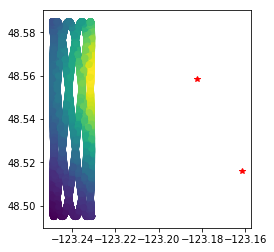

In [493]:
plt.show()

In [494]:
#from: http://tiao.io/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig.clf()
fig, ax = plt.subplots()

#ax.axis('equal')
ax.axis('scaled')
ax.set_xlim(( -123.3, -123.16))
ax.set_ylim((48.48,48.60))


#line, = ax.plot([], [], lw=2)
ax.plot(limeKiln['location'][0],limeKiln['location'][1],'k*')
ax.plot(orcaSound['location'][0],orcaSound['location'][1],'k*')

lkCirclePatch = plt.Circle((limeKiln['location'][0],limeKiln['location'][1]),radius=1,color='r')
osCirclePatch = plt.Circle((orcaSound['location'][0],orcaSound['location'][1]),radius=1,color='r')
lkFadeCircle = ax.add_patch(lkCirclePatch)
osFadeCircle = ax.add_patch(osCirclePatch)
orcaLoc, = ax.plot([],[],'bo',) 
orcaLoc.set_zorder(1000)
# cpsarason: we're going to animate a circle and control it's color/alpha, 
# so this will be a little different

# initialization function: plot the background of each frame
# def init():
#     line.set_data([], [])
#     return (line,)

# initialization function: plot the background of each frame
def init():
    orcaLoc.set_data([], [],)
    lkCirclePatch.set_radius(1)
    osCirclePatch.set_radius(1)
    return (orcaLoc,lkCirclePatch,osCirclePatch)

# animation function. This is called sequentially
# def animate(i):
#     x = np.linspace(0, 2, 1000)
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
#     line.set_data(x, y)
#     return (line,)

# animation function. This is called sequentially
def animate(i):
    orcaLoc.set_data(orca_locations[i])
    orcaLoc.set_alpha(min((orcaSound['df'][1][i] + limeKiln['df'][1][i]),1))
    lkCirclePatch.set_radius(.08)
    lkCirclePatch.set_alpha(min(limeKiln['df'][1][i]/500,0.9))
    osCirclePatch.set_radius(.08)
    osCirclePatch.set_alpha(min(orcaSound['df'][1][i]/500,0.9))
    #pingCircle.set_markersize(i*10)
    #pingAlpha = min(1/(i+0.1),1)
    #pingCircle.set_alpha(pingAlpha)
#     for j in range(10):
#         pingFadeCircle.set_data(orca_locations[i]+(0,j))
#         pingAlpha = min(1/(j+0.1),1)
#         pingFadeCircle.set_alpha(pingAlpha)
    return (orcaLoc,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200,interval=200, blit=True)

# cpsarason: This one is hard-coded to only change alpha value on fixed circles
#            In a more developed animation, for each orca position we would add another
#            circle patch "detection" at the receiver and add up all the "detection" 
#            values to plot a surface that corresponds to a likelihood value. 
#           
#            A modified version of this 
HTML(anim.to_html5_video())


In [495]:
# Now, to write out these dataframes as a file suitable for inputting into influxDB
# this will be 20000 points in the DB, useful as test data. I might crank up the number to do some load/perf testing
#
import random

# list of possible folks listening, could be userid. Can add other tags like "trusted" as well

listener = ['Scott', 'Christian', 'Fritz', 'Susan', 'Howie', 'Val','AutoDetect']


testDataFile = open('../data/testData/orcaSoundObsData.txt','w')
    #print(influx_header, file=testDataFile)

for i in range(10000):
    orcaString = "orcaSound,listener=" + random.choice(listener) + " intensity=" + str(orcaSound['df'][1][i]) + " " + str(int(orcaSound['df'][0][i][0].timestamp() *1000000000))
    print(orcaString, file=testDataFile)
    limeString = "limeKiln,listener=" + random.choice(listener) + " intensity=" + str(limeKiln['df'][1][i]) + " " + str(int(limeKiln['df'][0][i][0].timestamp()*1000000000))
    print(limeString, file=testDataFile)
testDataFile.close()

In [263]:
pwd

'/home/cpsarason/code/orcaSoundViz/notebooks'

In [424]:
#TODO: Add orca locations with geoHash as additional stream


In [221]:
test.resolution = datetime.timedelta(0,0,0,1)

AttributeError: type object 'datetime.datetime' has no attribute 'timedelta'